In [1]:
%load_ext autoreload
%autoreload 2

# Simple usage to predict FEN from Chess Image

In [2]:
from chessimg2pos import predict_fen

In [3]:
img_path = "../images/ccom_1.png" #REPLACE WITH THE PATH OF YOUR TEST IMAGE

fen = predict_fen(img_path)

In [4]:
print(fen)

11111pq1/rbP111kk/kn11k111/1k111kR1/1111K111/111111K1/KK111KBK/11111PQ1


In [5]:
predict_fen(img_path, output_type = "complex")

{'fen': '11111pq1/rbP111kk/kn11k111/1k111kR1/1111K111/111111K1/KK111KBK/11111PQ1',
 'confidence': 0.17703483074028992,
 'predictions': [('a8', '1', 0.999997615814209),
  ('b8', '1', 0.9999868869781494),
  ('c8', '1', 0.999997615814209),
  ('d8', '1', 0.9999868869781494),
  ('e8', '1', 0.999997615814209),
  ('f8', 'p', 0.7757436037063599),
  ('g8', 'q', 0.7184895873069763),
  ('h8', '1', 0.9999856948852539),
  ('a7', 'r', 0.9332210421562195),
  ('b7', 'b', 0.999527096748352),
  ('c7', 'P', 0.9999316930770874),
  ('d7', '1', 0.999997615814209),
  ('e7', '1', 0.9999871253967285),
  ('f7', '1', 0.999997615814209),
  ('g7', 'k', 0.9716789126396179),
  ('h7', 'k', 0.9998514652252197),
  ('a6', 'k', 0.9998464584350586),
  ('b6', 'n', 0.6207394003868103),
  ('c6', '1', 0.999997615814209),
  ('d6', '1', 0.9999871253967285),
  ('e6', 'k', 0.9998486042022705),
  ('f6', '1', 0.9999871253967285),
  ('g6', '1', 0.999997615814209),
  ('h6', '1', 0.9999858140945435),
  ('a5', '1', 0.9999868869781494),

# Training from your own set of Images
- Insert all your images in a folder, each image named with its fen (replace '/' with '-')
- e.g 1bk1bNQp-bbPQq1br-nbQrk11k-1qkbkBKN-KbBKRNPR-PbKbB1pk-rNBB1pKQ-bPNQbbrb.png

In [6]:
from chessimg2pos import ChessRecognitionTrainer

In [7]:
trainer = ChessRecognitionTrainer(
    images_dir="../../training_images/chessboards", # replace with your path
    model_path="../../models/test_model.pt",# replace with path where you want models tgo be saved
    generate_tiles=False,  # Set to True if tiles need to be generated from boards
    epochs = 5,
    overwrite = False
)
model, device, accuracy = trainer.train()

2025-05-25 21:54:55,776 - INFO - Model architecture:
ChessPieceClassifier(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=13, bias=True)
  )
)
2025-05-25 21:54:55,777 - INFO - Total parameters: 318,797
2025-05-25 21:55:05,740 - INFO - Epoch 1/5, Train Loss: 0.1479, Train Acc: 0.9553, Val Loss: 0.0121, Val Acc: 0.9979
2025-05-25 21:55:05,741 - INFO - New best model with validation

In [12]:
from chessimg2pos import ChessPositionPredictor

predictor = ChessPositionPredictor("../../models/test_model.pt")
result = predictor.predict_chessboard("../images/ccom_1.png", return_tiles=True)

In [16]:
print("Predicted FEN:", result["fen"])
print("Confidence:", result["confidence"])

Predicted FEN: 11111pq1/rkK111kk/kn11k111/1k111kR1/1111K111/111111K1/KK111KKK/11111KK1
Confidence: 0.07825521804407612


2025-05-25 22:00:58,764 - INFO - Lichess editor: https://lichess.org/editor/11111pq1/rkK111kk/kn11k111/1k111kR1/1111K111/111111K1/KK111KKK/11111KK1


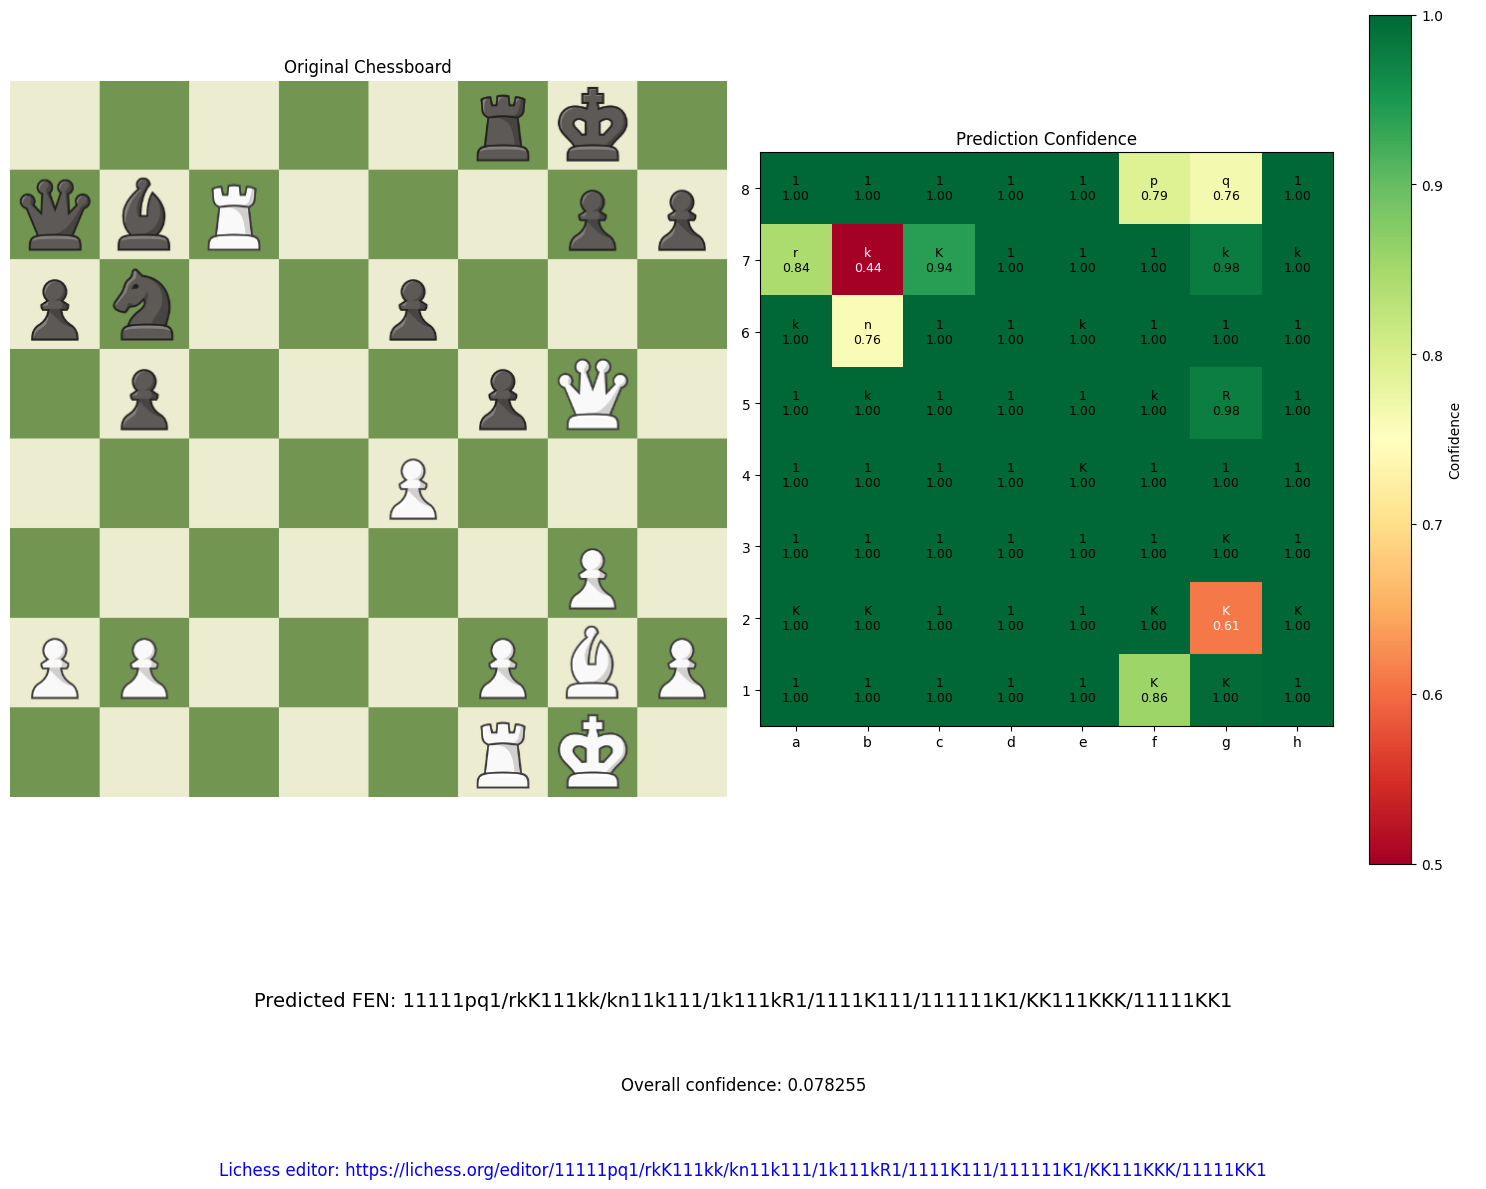

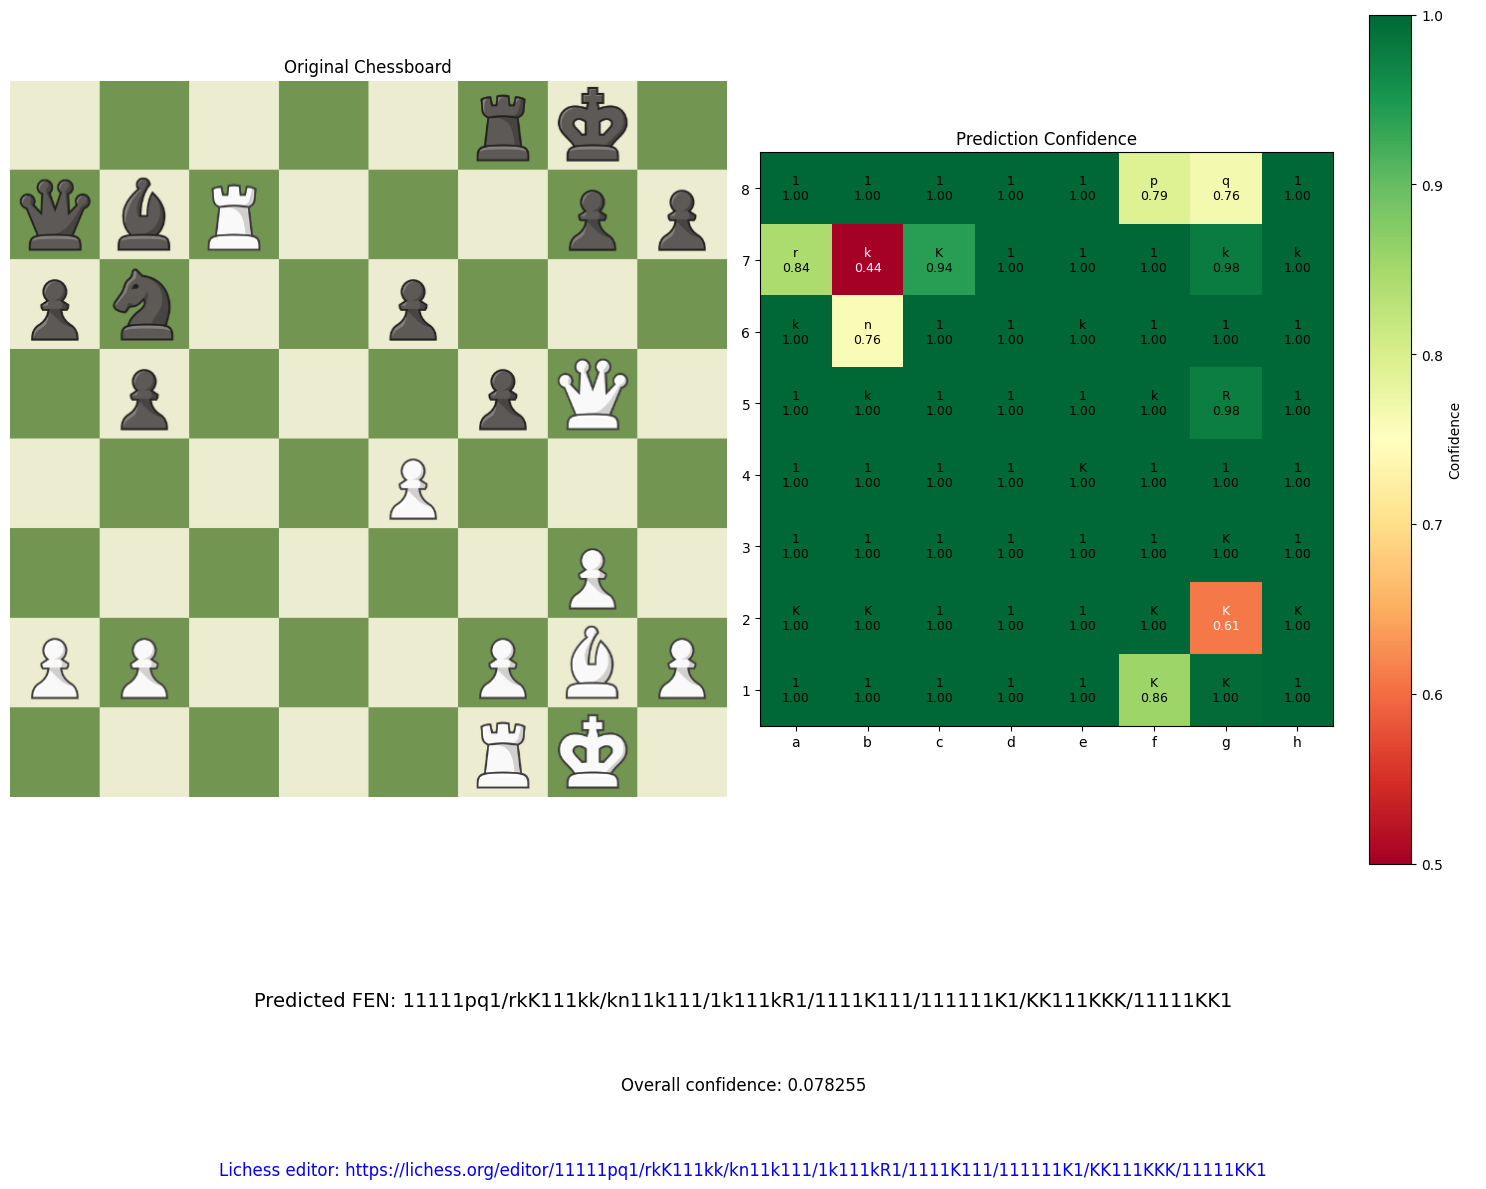

In [17]:
predictor.visualize_prediction(result)